In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def predict(X, W, W0):
    # X.shape ==> (n, d)
    # W.shape ==> (d, 1)
    dist = np.dot(X, W) + W0
    return sigmoid(dist)

In [127]:
def LossFunct(X, y, W, W0):
    yPred = predict(X, W, W0)
    loss = -1 * np.mean((y * np.log(yPred) + (1-y) * np.log(1-yPred)))
    return loss

In [212]:
def gradient(X, y, yPred):
    n = X.shape[0]
    return np.dot(X.T, (yPred-y))/n

def gradientDescent(X, y, W, W0, learningRate=0.5, iterations=30):
    errorList = []
    for loop in range(iterations):
        yPred = predict(X=X, W=W, W0=W0)
        gradientVal = gradient(X=X, y=y, yPred=yPred)
        W = W - learningRate * gradientVal
        W0 = (yPred - y)
        
        loss = LossFunct(X=X, y=y, W=W, W0=W0)
        errorList.append(loss)

    return W, W0, errorList

(500, 2) (500, 1)


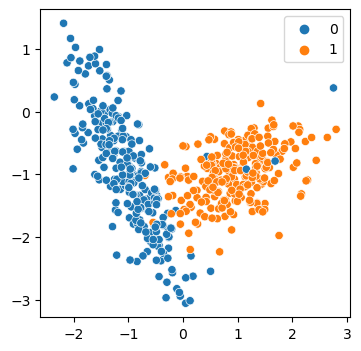

In [214]:
##dataset creation
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, 
                           n_features=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
#converting row vector to column vector
y = y.reshape(-1, 1)
print(X.shape, y.shape)

plt.figure(figsize=(4, 4))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.reshape(-1,))
plt.show()

In [216]:
W = np.random.randint(low=-10, high=10, size=2).reshape(2,-1)
W0 = np.random.random(1)

In [280]:
WFinal, W0Final, error = gradientDescent(X=X, y=y, W=W, W0=W0, learningRate=0.7, iterations=50)

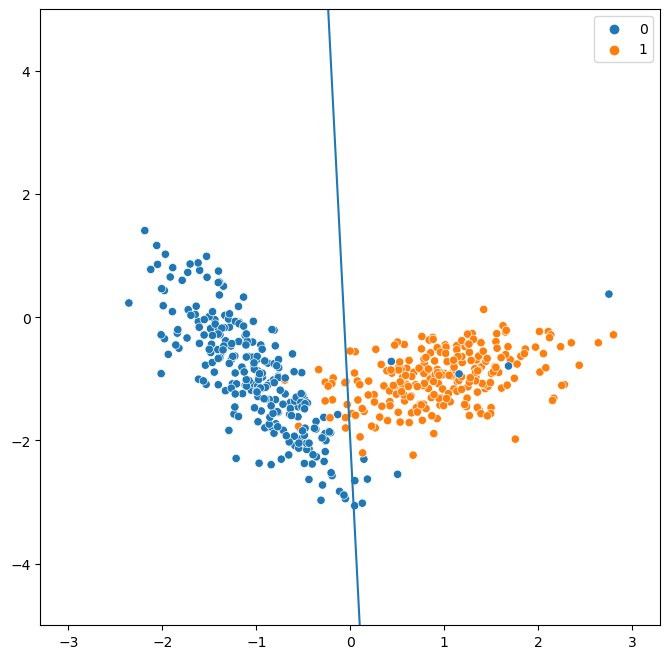

In [282]:
X1Line=np.linspace(-3, 3, 100)
W1, W2 = WFinal
X2Line = (-W0 - (W1 * X1Line))/W2

plt.figure(figsize=(8, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.reshape(-1,))
plt.plot(X1Line, X2Line)
plt.ylim(-5, 5)
plt.show()

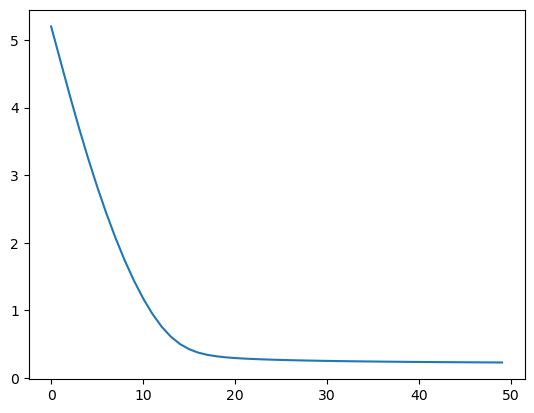

In [283]:
plt.plot(error)

